# Exercise 1: Let's start with image classification tasks


In this Lab, we play with image classification tasks.
In particular, we use the MNIST dataset, a milestone of image classification.
The task consists in predicting the number contained in a given image.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

We now load the dataset, and then show a couple of samples.

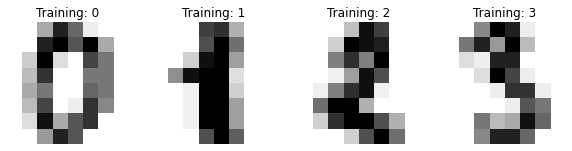

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# Split data into 80% train+validation and 20% test subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

In [ ]:
# Split the train+validation into 80% train and 20% validation subsets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=False
)

In [ ]:
len(X_train), len(X_val), len(X_test)

(1149, 288, 360)

### Task 1: Train on raw data.

In this first part, we ask you to train three models: *decision tree*, *random forest*, and *svm*.


We are going to use raw data.
In particular, gray-scale images are 2D arrays $(width, height)$. Sklearn already converts each sample in a 1D array $(width\; \times\; height)$.
You task is to train the 3 models doing a proper gridsearch for selecting some of the hyperparameters (you can choose the hyperparameters and their values).

Comment the performance on both training and validation sets.

Let's start with doing model selection on decision trees in the box below.

In [ ]:
### -------------- Type your solution here ---------------


Let's continue by doing model selection on random forest in the box below.

In [ ]:
### -------------- Type your solution here ---------------


Let's continue by doing model selection on SVM in the box below.

In [ ]:
### -------------- Type your solution here ---------------


Finally, let's compare F1 scores on training and validation sets

In [ ]:
### -------------- Type your solution here ---------------


### Task 2: Error analysis

The role of a data scientist is not only to train models, but also to analyse models' outcomes.

The *error analysis* is an example of something you should do after training your models.
With this analysis, your aim is to answer the following question: "why is my model mispredicting some samples?"

For example, sometimes the errors are legitimate. We are going to see an example now.

Look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions"> [link] </a>.
Use the function described above to create a ConfusionMatrix from the best model you find above over the testing set.

Do you see any interesting pattern?


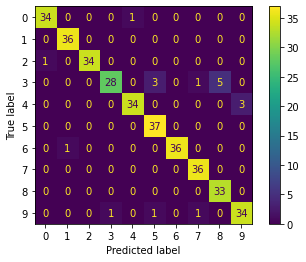

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_test_pred = svc_v1.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=svc_v1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_v1.classes_)
disp.plot()
plt.show()


There are three examples of class 4 which are predicted as class 9. Let's see how they look like


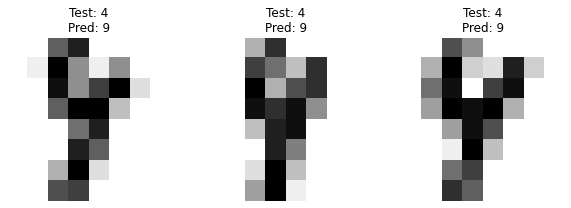

In [ ]:
indices = np.all([ (y_test==4), (y_test_pred==9) ], axis=0) # find the index of the examples of class 4 predicted as class 9
                                                            # np.all returns the elements of the input vector that satisfy all conditions
_, axes = plt.subplots(nrows=1, ncols=sum(indices==True), figsize=(10, 3))
for ax, image, label, pred_label in zip(axes, X_test[indices], y_test[indices], y_test_pred[indices]):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Test: %i\nPred: %i" % (label, pred_label))


I could argue that those seem actually 9s instead of 4s. Therefore, I might decide not to spend time improving the performance of the algorithm. These examples could be used when discussing the performance of our learning system with the clients, to say that those are mistakes that even some humans would do (of course we need to check that the same happens for other mistakes).
In summary, sometimes it is ok to have classifiers that do mistakes if these mistakes "make sense" somehow.


### Task 3: Neural Networks

During our course we saw several learning algorithms and, among these, the neural networks.

In this task, we ask you to train a simple neural network over the training set. Then evaluate it using on validation set.

Define the following neural network:


1.   First layer: input = size of a data sample, units = size of a data sample, activation = relu.
2.   Second layer: units = 32, activation = relu.
3.   Third layer: units = number of classes, activation = softmax

Include an early stopping mechanism during your training.



In [ ]:
### -------------- Type your solution here ---------------


# Exercise 2: move on to a real world dataset

In this second exercise we work on the covertype dataset, a dataset containing $30 \times 30$ images containing different type of animal faces.

Your goal is to predict the correct one.


In [ ]:
#we first collect the data, it should take a few seconds
!wget https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/AnimalFace.zip

--2021-12-09 12:20:18--  https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/AnimalFace.zip
Resolving vcla.stat.ucla.edu (vcla.stat.ucla.edu)... 138.68.40.119
Connecting to vcla.stat.ucla.edu (vcla.stat.ucla.edu)|138.68.40.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37324985 (36M) [application/zip]
Saving to: ‘AnimalFace.zip’

AnimalFace.zip      100%[===================>]  35.60M  21.5MB/s    in 1.7s    

2021-12-09 12:20:20 (21.5 MB/s) - ‘AnimalFace.zip’ saved [37324985/37324985]



In [ ]:
#we unzip the data
!unzip -qq AnimalFace.zip -d Image

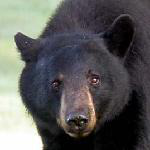

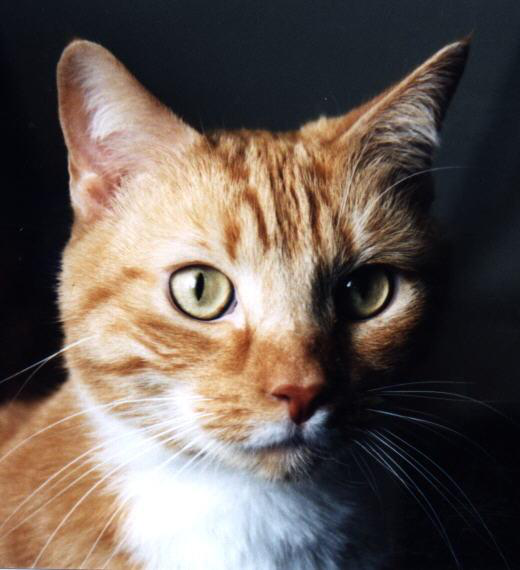

In [ ]:
#we now see a few examples
from IPython.display import display
from PIL import Image

path="./Image/Image/BearHead/bearfrontal0001.jpg"
display(Image.open(path))

path="./Image/Image/CatHead/cat000852.jpg"
display(Image.open(path))


### Load the dataset

It's time to load the dataset.
The first thing to do is read all of the images, but since we work with fixed sizes, we need to "resize everything" (e.g., to $50 \times 50$).

In [ ]:
import os
import numpy as np

In [ ]:
#generate the list of paths
bear_paths = [f"Image/Image/BearHead/{x}" for x in os.listdir('Image/Image/BearHead/')]
cat_paths = [f"Image/Image/CatHead/{x}" for x in os.listdir('Image/Image/CatHead/')]

print(len(bear_paths), len(cat_paths))

101 160


In [ ]:
#define a function that loads the given images
def load_image(x, x_size = 50, y_size = 50):
    #open the image
    img = Image.open(x)

    #resize
    img = img.resize((x_size, y_size), Image.ANTIALIAS)

    #convert to numpy array
    img = np.asarray(img)

    return img

In [ ]:
#load the images
animals_x = []
animals_y = []

for x in bear_paths:
    img = load_image(x)
    animals_x.append(img)
    animals_y.append("bear")

for x in cat_paths:
    img = load_image(x)
    animals_x.append(img)
    animals_y.append("cat")

In [ ]:
#we can have a look at a data sample
animals_x[0].shape

(50, 50, 3)

In [ ]:
animals_x = np.array(animals_x)
animals_y = np.array(animals_y)

In [ ]:
#define the training, validation, and testing sets
# Split data into 80% train and 20% test subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    animals_x, animals_y, test_size=0.2, shuffle=True, random_state = 123
)

# Split data into 80% train and 20% test subsets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=True, random_state = 123
)

### Try a simple classification

We now can try to train a simple decision tree. Before doing that, we need to keep in mind that our data is defined as a 3D sample, where we have 3 channels (RGB), and 50 x 50 pixels.

We need to flat the image, i.e., from $(50, 50, 3)$ to $(50 \times 50 \times 3)$.

In [ ]:
def preprocessing(x):
    #flat the data
    x = x.flatten()

    return x


In [ ]:
#preprocess
X_train_prep = np.array([preprocessing(x) for x in X_train])
X_val_prep = np.array([preprocessing(x) for x in X_val])
X_test_prep = np.array([preprocessing(x) for x in X_test])

X_train_prep[0].shape

(7500,)

Now it is your turn. Train a DecisionTree, a RandomForest, an SVM, and a NN (as you did in the previous exercise with a proper parameter selection) and see how they perform on both training and validation set.

Be careful with the neural network, you might need to do more "steps" compared to the previous exercise for converting the ground-truth to the categorical data. Specifically, the function to_categorical of Keras expects as input numbers, not strings.

Define the following neural network:


1.   First layer: input = size of a data sample, units = size of a data sample, activation = relu.
2.   Second layer: units = 256, activation = relu.
3.   Third layer: units = number of classes, activation = softmax

In [ ]:
### -------------- Type your solution here ---------------



In [ ]:
from collections import Counter
Counter(y_val)

Counter({'bear': 12, 'cat': 30})

We see a clear trend of overfitting in the decision tree, while this trend is weaker o the random forest.
The SVC works fine, while the NN has poor performance.  

Can we improve these performance?

The size of the dataset might have an impact, but we also need to keep in mind that sometimes it is not easy to find useful insights from samples that contain a lot of data.

In this cases, we need to apply some transformation to the data to reduce its size (feature extraction).  

### Preprocessing 1 - grey scale

This time, we want to improve the preprocessing we applied.
For example, let's move from 3D images (RGB) to gray-scale images (2D).

In [ ]:
from sklearn.pipeline import Pipeline
import skimage
from skimage.color import rgb2gray

In [ ]:

def preprocessing_alternative(x):
    #convert to gray
    x = rgb2gray(x)

    #flat the data
    x = x.flatten()

    return x



While the previous function works perfectly, we want to show you another version of the preprocessing that leverages Sklearn functions.
Note that the following cells aim to show you an alternative version (this part should be considered optional with respect to the exam).
With sklearn, we can define some *fit_transform* functions.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class Flatter(BaseEstimator, TransformerMixin):
    """
    Flat an image from 3D to 2D
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array(X).reshape(len(X), -1)

In [ ]:
class RGB2GrayScale(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([rgb2gray(img) for img in X])

In [ ]:
# #define a pipeline for the preprocessing
preprocessing = Pipeline([
    ('grayscaler', RGB2GrayScale()),
    ('flatter', Flatter())
])

Now it's your turn!
Preprocess the data (i.e., x_train, x_val, and x_test) with the function **fit_transform** (a method of the *pipeline* object).
Then, retrain re-apply the training as you did in the previous part.
Any improvement?

In [ ]:
### -------------- Type your solution here ---------------

# X_train_prep = preprocessing.fit_transform(X_train)


#preprocessing without sklearn
#X_train_prep = np.array([preprocessing_alternative(x) for x in X_train])




We only see improvements in the NN. This might be due to the dimensionality reduction of our input (from 7500 to 2500).

### Preprocessing 2: Hog

In the previous example, we did not improve the performance with respect to the classifiers trained on raw data.

We now aim to use hog (histogram of oriented gradients) transformations: <a href="https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html"> [link] </a>.
Hog is a popular feature description technique used in computer vision. It highlights those pixels whose color is different from the neighbouring ones (the intensity of the pixel is proportional to such difference, white pixels indicating the highest difference). Basically, it should highlight the border of the objects in the image.
The figure below shows the effect of hog: on the left, the original image, on the right, the processed version.

Read the documentation if you want further information on the type of features we are going to extract.
Then, replace the rgb2grayscale transformer with the hog transformer that we defined in the following cell.
Retrain the three models and check the performance on train and validation.


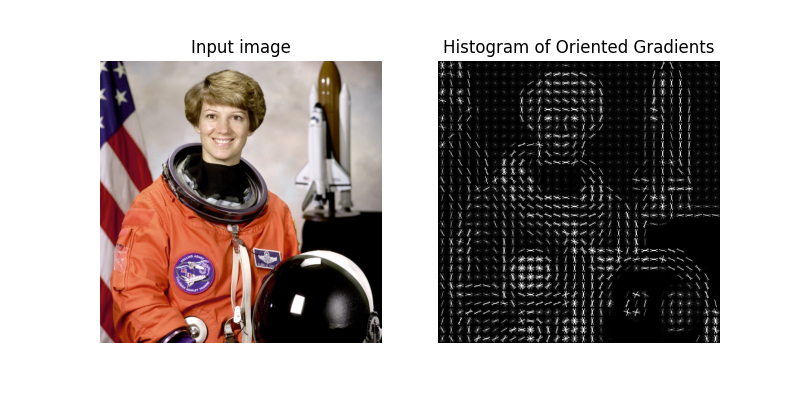

In [ ]:
from IPython.display import Image as ImageJP
ImageJP("https://scikit-image.org/docs/dev/_images/sphx_glr_plot_hog_001.png")

In [ ]:
from skimage.feature import hog


class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)

        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [ ]:

# #define a pipeline for the preprocessing
preprocessing2 = Pipeline([
    ('hog', HogTransformer()),
    ('flatter', Flatter())
])

In [ ]:
### -------------- Type your solution here ---------------



# Exercise 3: From Binary to Multi class classification

Use first 5 classes on the previous dataset, and extend the previous classifiers (or make new versions of them) to deal with this multiclass problem.

You first need to create the dataset, following what we did on exercise 2.

In [ ]:
### -------------- Type your solution here ---------------



In [ ]:
#define the training, validation, and testing sets
# Split data into 80% train and 20% test subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    animals_x, animals_y, test_size=0.2, shuffle=True, random_state = 123
)

# Split data into 80% train and 20% test subsets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=True, random_state = 123
)

We now proceed with preprocessing, training and testing the learning algorithms.

In [ ]:
### -------------- Type your solution here ---------------

